In [10]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
import numpy as np 

def parser(x):
    return datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

series = read_csv('train.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

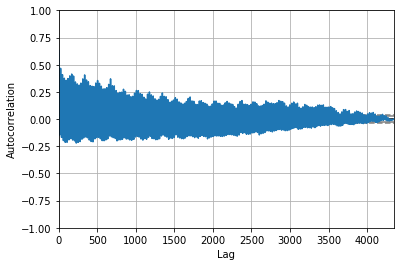

In [14]:
X = series.values
X1 = X[X[:,0] == 1][:,1]
X2 = X[X[:,0] == 2][:,1]
X3 = X[X[:,0] == 3][:,1]
X4 = X[X[:,0] == 4][:,1]

autocorrelation_plot(X4)
plt.show()

In [19]:
X = X3
X=X.astype(np.float64)

print X.shape
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

(14592,)


In [21]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

KeyboardInterrupt: 